# Modeling

In [1]:
# importing libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn import preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")

# adding scripts to path
sys.path.append(os.path.abspath("../scripts/python"))

In [2]:
# loading scripts
from connection_manager import Manager
from modeling_utils import Modeling_Utils
man = Manager()
util = Modeling_Utils()

In [3]:
# establishing connection

connection, cursor = man.connect_to_server(host="localhost", port=5432, user="warehouse", password="warehouse", dbName="warehouse")

successfully connected; cursor: <cursor object at 0x7f459d502d60; closed: 0>


In [4]:
# fetching data
data = man.fetch_data(conn=connection, limit=10000)
data.head(5)

,campaign_id,types,width,height,creative_id,auction_id,browser_ts,game_key,geo_country,site_name,...,volume_agreed,gross_cost_or_budget,agency_fee,percentages,net_cost,design_feature,feature_type,feature_variety,sub_feature,feature_value
0,zqb4z95,impression,250,250,1oseccn9,abe1d31903e14dc2b7ee3e41b57039af,2021-03-15 05:27:49,82d6d13da53d863132e82cab28f376ab/5ecfa6a8bf1ba...,United States,wvsportsnow.com,...,0.0,0.0,Percentage,0.0,0,None,None,None,None,None
1,zqb4z95,impression,250,250,1oseccn9,9ba42e4f4ef14b2897ebacd2d65dc564,2021-03-15 05:28:18,82d6d13da53d863132e82cab28f376ab/5ecfa6a8bf1ba...,United States,www.horoscope.com,...,0.0,0.0,Percentage,0.0,0,None,None,None,None,None
2,zqb4z95,impression,480,480,sbuh5b98,843397bdea2447d794a61f61d8a32508,2021-03-15 05:28:23,5d8ff369f6297025af1040d6b7cdbcd6/8dd1fc677f788...,United States,mediabiasfactcheck.com,...,0.0,0.0,Percentage,0.0,0,None,None,None,None,None
3,zqb4z95,first_dropped,250,250,1oseccn9,6da29c2e2fb54be1808726d0316ab074,2021-03-15 05:28:23,82d6d13da53d863132e82cab28f376ab/5ecfa6a8bf1ba...,United States,thecinemaholic.com,...,0.0,0.0,Percentage,0.0,0,None,None,None,None,None
4,zqb4z95,impression,480,480,sbuh5b98,fffec5261c164c0c8486dd345555b8b2,2021-03-15 05:28:25,5d8ff369f6297025af1040d6b7cdbcd6/8dd1fc677f788...,United States,www.imore.com,...,0.0,0.0,Percentage,0.0,0,None,None,None,None,None


In [5]:
# checking data
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")
util.summ_columns(data)

 There are 10000 rows and 36 columns


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,campaign_id,0,0.0,object,6
1,types,0,0.0,object,3
2,width,0,0.0,object,2
3,height,0,0.0,object,2
4,creative_id,0,0.0,object,32
5,auction_id,0,0.0,object,10000
6,browser_ts,0,0.0,datetime64[ns],8646
7,game_key,0,0.0,object,29
8,geo_country,0,0.0,object,2
9,site_name,0,0.0,object,1333


## Automated Data Cleaning

In [6]:
# apply variable remover
data2 = util.reduce_dim_missing(data, 30)

successfully removed


In [7]:
# applying the mode based missing filler
data3 = util.fill_missing_by_mode(data2)

successfully filled


In [8]:
# apply mean based missing value filler
data4 = util.fill_missing_by_mean(data3)

successfully filled


In [9]:
data4.head()

,campaign_id,types,width,height,creative_id,auction_id,browser_ts,game_key,geo_country,site_name,...,serving_location,black_white_audience,cost_centre,currency,buy_rate_cpe,volume_agreed,gross_cost_or_budget,agency_fee,percentages,net_cost
0,zqb4z95,impression,250,250,1oseccn9,abe1d31903e14dc2b7ee3e41b57039af,2021-03-15 05:27:49,82d6d13da53d863132e82cab28f376ab/5ecfa6a8bf1ba...,United States,wvsportsnow.com,...,US National,Black/white/audience list will be provided later,USA,USD,13.0,0.0,0.0,Percentage,0.0,0
1,zqb4z95,impression,250,250,1oseccn9,9ba42e4f4ef14b2897ebacd2d65dc564,2021-03-15 05:28:18,82d6d13da53d863132e82cab28f376ab/5ecfa6a8bf1ba...,United States,www.horoscope.com,...,US National,Black/white/audience list will be provided later,USA,USD,13.0,0.0,0.0,Percentage,0.0,0
2,zqb4z95,impression,480,480,sbuh5b98,843397bdea2447d794a61f61d8a32508,2021-03-15 05:28:23,5d8ff369f6297025af1040d6b7cdbcd6/8dd1fc677f788...,United States,mediabiasfactcheck.com,...,US National,Black/white/audience list will be provided later,USA,USD,13.0,0.0,0.0,Percentage,0.0,0
3,zqb4z95,first_dropped,250,250,1oseccn9,6da29c2e2fb54be1808726d0316ab074,2021-03-15 05:28:23,82d6d13da53d863132e82cab28f376ab/5ecfa6a8bf1ba...,United States,thecinemaholic.com,...,US National,Black/white/audience list will be provided later,USA,USD,13.0,0.0,0.0,Percentage,0.0,0
4,zqb4z95,impression,480,480,sbuh5b98,fffec5261c164c0c8486dd345555b8b2,2021-03-15 05:28:25,5d8ff369f6297025af1040d6b7cdbcd6/8dd1fc677f788...,United States,www.imore.com,...,US National,Black/white/audience list will be provided later,USA,USD,13.0,0.0,0.0,Percentage,0.0,0


## Automated Filtering

In [10]:
# apply correlation based variable remover
data5 = util.remove_correlated(data4, 0.6)

successfully labeled
number of correlated variables: 18
..................................................
correlated features:  {'net_cost', 'serving_location', 'cost_centre', 'campaign_name', 'submission_date', 'volume_agreed', 'descriptions', 'campaign_objectives', 'gross_cost_or_budget', 'currency', 'buy_rate_cpe', 'game_key', 'kpis', 'percentages', 'height', 'enddate', 'geo_country', 'placement'}


In [11]:
# remove the blacklist variables (ids, dates, etc...)
blacklist = ["game_key", "browser_ts", "creative_id", 
            "auction_id", "campaign_id", "campaign_name", 
            "descriptions", "kpis", "black_white_audience", "submission_date"]

# apply blacklist remover
data6 = util.remove_cols(df=data5, cols=blacklist)

successfully removed


In [12]:
# check progress
data6.head()

,types,width,site_name,platform_os,device_type,browser,startdate,agency_fee
0,impression,250,wvsportsnow.com,6,Tablet,Facebook,2021-03-15,Percentage
1,impression,250,www.horoscope.com,6,Mobile,Mobile Safari,2021-03-15,Percentage
2,impression,480,mediabiasfactcheck.com,6,Mobile,Chrome Mobile,2021-03-15,Percentage
3,first_dropped,250,thecinemaholic.com,6,Mobile,Chrome Mobile,2021-03-15,Percentage
4,impression,480,www.imore.com,6,Mobile,Chrome Mobile,2021-03-15,Percentage


## Automated Prepration

In [13]:
# identify feature and target variables
# perform nlp and one hot incoding to prepare the features.
target = data6["types"]
features = util.remove_cols(data6, ["types"])

successfully removed


In [14]:
# apply text cleaner
features2 = util.process_features(features)

successfully cleaned
successfully cleaned
successfully cleaned
successfully cleaned
successfully cleaned
successfully cleaned
successfully cleaned
successfully processed


In [15]:
# apply NLP

features3, enco = util.labeler(features2)
features3.head()

successfully labeled


,width,site_name,platform_os,device_type,browser,startdate,agency_fee
0,0,643,3,1,6,4,0
1,0,904,3,0,11,4,0
2,1,346,3,0,3,4,0
3,0,545,3,0,3,4,0
4,1,918,3,0,3,4,0


## Training and Testing

In [16]:
# train and test model
max_depth = 10
max_features = 0.75
n_estimators = 200

mod, par, metr = util.train(features3, target, max_depth, max_features, n_estimators)


                     precision    recall  f1-score   support

click-through-event       0.00      0.00      0.00        20
      first_dropped       0.00      0.00      0.00        80
         impression       0.95      1.00      0.97      1900

           accuracy                           0.95      2000
          macro avg       0.32      0.33      0.32      2000
       weighted avg       0.90      0.95      0.93      2000

successfully trained and tested


successfully returned


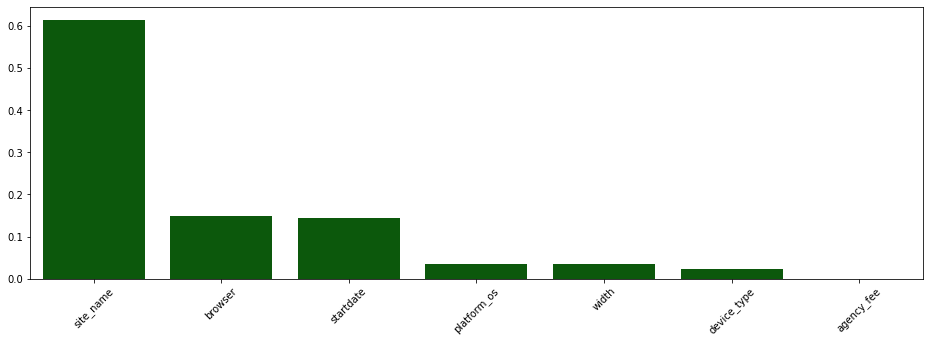

In [17]:
# Check feature importance 
imp_image, importance = util.get_importance(mod, features3)

In [18]:
# saving model, parameters, metrics, and encoder.
util.ml_track(enco, mod, par, metr)

Successfully registered model 'adludio_model2022-08-10-02-26-06'.
2022/08/10 02:26:35 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: adludio_model2022-08-10-02-26-06, version 1
Created version '1' of model 'adludio_model2022-08-10-02-26-06'.


successfully saved
